In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import statistics

### Defining Function to Integrate. 

In This case 
$$ e^{-\frac{x^2}{2}} $$

In [10]:
UpLimit = 1  # upper limit
LowerLimit = 0  # lower limit


def fun(x):  # function to be integrated
    return np.exp(-(x**2) / 2)

### Monte Carlo algorithem

In [11]:
def MonteCarlo(fun, UpLimit, LowerLimit, SimNumber):
    I = 10000  # number of itaration
    IntegralValues = []
    for i in range(SimNumber):
        X = np.random.uniform(LowerLimit, UpLimit, I)
        ValuesOfFunction = fun(X)
        SumfFunction = ValuesOfFunction.sum()
        IntegralValue = SumfFunction / float(len(ValuesOfFunction))
        IntegralValues.append(IntegralValue)
    return sum(IntegralValues) / len(IntegralValues)

### Output in CSV file

In [12]:
with open("Value_of_Integral.csv", "w", newline="") as file:
    writter = csv.writer(file)
    writter.writerow(["n", "Value of Integration"])
    for n in [50, 100, 1000, 10000, 100000]:
        writter.writerow(
            [
                n,
                MonteCarlo(
                    fun=fun, UpLimit=UpLimit, LowerLimit=LowerLimit, SimNumber=n
                ),
            ]
        )
    file.close

### Ploting

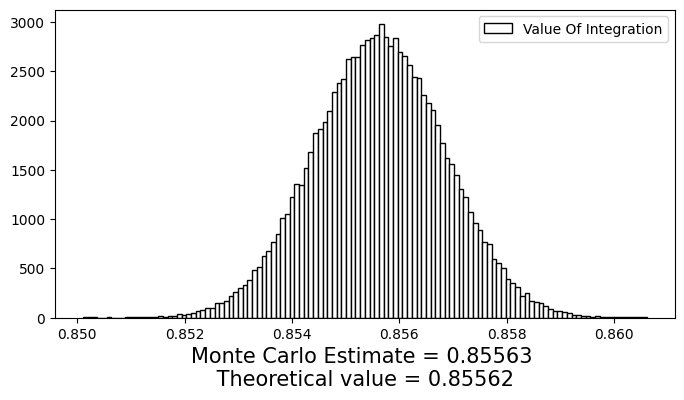

In [13]:
def MonteCarlo_For_Plot(fun, UpLimit, LowerLimit, SimNumber):
    I = 10000  # number of itaration
    IntegralValues = []
    for i in range(SimNumber):
        X = np.random.uniform(LowerLimit, UpLimit, I)
        ValuesOfFunction = fun(X)
        SumfFunction = ValuesOfFunction.sum()
        IntegralValue = SumfFunction / float(len(ValuesOfFunction))
        IntegralValues.append(IntegralValue)
    return IntegralValues

integral_value = MonteCarlo_For_Plot(fun, UpLimit, LowerLimit, 100000)
plt.figure(figsize=(8, 4))
plt.hist(
    integral_value,
    color="white",
    bins=120,
    edgecolor="black",
    label="Value Of Integration"
)
# plt.axvline(statistics.mean(integral_value), c="b",linewidth=1.5,label='sample mean')
plt.xlabel(f'Monte Carlo Estimate = {statistics.mean(integral_value):.5f} \n Theoretical value = 0.85562 ', fontsize=15)
plt.legend()
plt.show()